## First look

In [471]:
!unzip datasets.zip

In [473]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd

In [474]:
facebook_df = pd.read_csv('facebook_dataset.csv', on_bad_lines='skip')
google_df = pd.read_csv('google_dataset.csv', on_bad_lines='skip')
website_df = pd.read_csv('website_dataset.csv', on_bad_lines='skip', delimiter=';')

<ipython-input-474-aa5037dc3c6f>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  google_df = pd.read_csv('google_dataset.csv', on_bad_lines='skip')


In [475]:
# Inspect Facebook dataset
print(facebook_df.info())
print(facebook_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71167 entries, 0 to 71166
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   domain              71167 non-null  object 
 1   address             56690 non-null  object 
 2   categories          54593 non-null  object 
 3   city                44567 non-null  object 
 4   country_code        57191 non-null  object 
 5   country_name        44865 non-null  object 
 6   description         27189 non-null  object 
 7   email               19753 non-null  object 
 8   link                71167 non-null  object 
 9   name                71167 non-null  object 
 10  page_type           71163 non-null  object 
 11  phone               44349 non-null  float64
 12  phone_country_code  37551 non-null  object 
 13  region_code         44562 non-null  object 
 14  region_name         44562 non-null  object 
 15  zip_code            35623 non-null  object 
dtypes: f

In [476]:
# Inspect Google dataset
print(google_df.info())
print(google_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346925 entries, 0 to 346924
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   address             321315 non-null  object
 1   category            295862 non-null  object
 2   city                302199 non-null  object
 3   country_code        295361 non-null  object
 4   country_name        302235 non-null  object
 5   name                346893 non-null  object
 6   phone               314789 non-null  object
 7   phone_country_code  234104 non-null  object
 8   raw_address         302909 non-null  object
 9   raw_phone           318977 non-null  object
 10  region_code         302049 non-null  object
 11  region_name         302054 non-null  object
 12  text                343411 non-null  object
 13  zip_code            265646 non-null  object
 14  domain              346923 non-null  object
dtypes: object(15)
memory usage: 39.7+ MB
None
         

In [477]:
# Inspect Website dataset
print(website_df.info())
print(website_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72018 entries, 0 to 72017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   root_domain    72017 non-null  object
 1   domain_suffix  71900 non-null  object
 2   language       66826 non-null  object
 3   legal_name     31989 non-null  object
 4   main_city      60966 non-null  object
 5   main_country   64869 non-null  object
 6   main_region    60933 non-null  object
 7   phone          65640 non-null  object
 8   site_name      68714 non-null  object
 9   tld            71757 non-null  object
 10  s_category     70634 non-null  object
dtypes: object(11)
memory usage: 6.0+ MB
None
           root_domain domain_suffix language  \
0     converterman.com           NaN      NaN   
1  clothesencounter.ca            ca       en   
2       investa.com.au        com.au       en   
3    timminsgarage.com           com       en   
4         destinate.ca            ca     

In [478]:
# Get columns of each dataset
facebook_columns = set(facebook_df.columns)
google_columns = set(google_df.columns)
website_columns = set(website_df.columns)

In [479]:
# Find common columns
common_columns = facebook_columns & google_columns & website_columns
print("Common columns:", common_columns)

Common columns: {'phone'}


In [480]:
# Check for missing values
print(facebook_df.isnull().sum(), '\n\n')
print(google_df.isnull().sum(), '\n\n')
print(website_df.isnull().sum(), '\n\n')

domain                    0
address               14477
categories            16574
city                  26600
country_code          13976
country_name          26302
description           43978
email                 51414
link                      0
name                      0
page_type                 4
phone                 26818
phone_country_code    33616
region_code           26605
region_name           26605
zip_code              35544
dtype: int64 


address                25610
category               51063
city                   44726
country_code           51564
country_name           44690
name                      32
phone                  32136
phone_country_code    112821
raw_address            44016
raw_phone              27948
region_code            44876
region_name            44871
text                    3514
zip_code               81279
domain                     2
dtype: int64 


root_domain          1
domain_suffix      118
language          5192
legal_name      

In [481]:
# Check for duplicates
print('facebook: ', facebook_df.duplicated().sum())
print('google: ', google_df.duplicated().sum())
print('website: ', website_df.duplicated().sum())

facebook:  0
google:  0
website:  0


## Pre-processing and Clean up

In [482]:
# Standardizing website columns

website_df.rename(
    columns={
        'root_domain': 'domain',
        'main_city': 'city',
        'main_country': 'country',
        'main_region': 'region',
        'site_name': 'name',
        's_category': 'category',
        },
    inplace=True)

In [483]:
# Standardizing facebook columns

facebook_df.rename(
    columns={
        'country_name': 'country',
        'region_name': 'region',
        },
    inplace=True)

In [484]:
# Standardizing google columns

google_df.rename(
    columns={
        'country_name': 'country',
        'region_name': 'region',
        'text': 'description'
        },
    inplace=True)

In [485]:
# Find common columns after renaming
facebook_columns = set(facebook_df.columns)
google_columns = set(google_df.columns)
website_columns = set(website_df.columns)

common_columns_after_rename = facebook_columns & google_columns & website_columns
print("Common columns after renaming:", common_columns_after_rename)


Common columns after renaming: {'city', 'phone', 'name', 'country', 'domain', 'region'}


In [486]:
# Split the 'Category' column by '|' and create a list
facebook_df['category'] = facebook_df['categories'].str.split('|')
facebook_df.drop('categories', axis=1, inplace=True)

print(facebook_df.head())


                    domain                                            address  \
0       euro-hygiene-34.fr  134 rue entrepreneurs, za du vigné, 30420, cal...   
1  lakesidehomeservices.ca                                                NaN   
2        rossiterboats.com                                                NaN   
3     caa-architecture.com  601 cordova st w # 270, v6b 1g1, vancouver, bc...   
4            apexsurety.ca  unit 3 - 4 donald street, r3l 2t7, winnipeg, m...   

        city country_code country  \
0  calvisson           fr  france   
1        NaN           ca     NaN   
2        NaN          NaN     NaN   
3  vancouver           ca  canada   
4   winnipeg           ca  canada   

                                         description  \
0                                                NaN   
1                                                NaN   
2  At Rossiter Boats we build semi-custom power b...   
3                                                NaN   
4         

In [487]:
def to_list(value):
    if isinstance(value, list):
        return value
    elif pd.isna(value):
        return []
    else:
        return [value]

facebook_df['category'] = facebook_df['category'].apply(to_list)
google_df['category'] = google_df['category'].apply(to_list)
website_df['category'] = website_df['category'].apply(to_list)


In [488]:
# Convert 'phone' column to object type for all dataframes
facebook_df['phone'] = facebook_df['phone'].astype(str)
google_df['phone'] = google_df['phone'].astype(str)
website_df['phone'] = website_df['phone'].astype(str)


In [489]:
# Company Names
# Convert to lowercase to ensure case-insensitive comparisons.
# Trim leading/trailing spaces.
# Remove special characters (&, ,, ., /, - inconsistencies).
# Normalize common abbreviations (e.g., Inc. → Incorporated, Ltd. → Limited).

import re

def standardize_company_name(name):
    """
    Standardizes company names for consistent comparisons.
    """
    if not isinstance(name, str):  # Handle cases where name might not be a string
        return ""

    name = name.lower()
    name = name.strip()
    name = re.sub(r'[&.,/\\-]', '', name)  # Remove special characters

    # Normalize common abbreviations
    name = name.replace('inc', 'incorporated')
    name = name.replace('ltd', 'limited')
    name = name.replace('llc', 'limited liability company')
    name = name.replace('co', 'company')
    name = name.replace('corp', 'corporation')

    # account for foreign alphabets
    name = re.sub(r'[^\x00-\x7F]+', '', name)
    name = re.sub(r'[^\w\s]', '', name)
    name = re.sub(r'\s+', ' ', name)

    return name

# Example usage (assuming you have a 'Company Name' column in your DataFrame)
facebook_df['name'] = facebook_df['name'].apply(standardize_company_name)
google_df['name'] = google_df['name'].apply(standardize_company_name)
website_df['name'] = website_df['name'].apply(standardize_company_name)

print(facebook_df.head())
print(google_df.head())
print(website_df.head())


                    domain                                            address  \
0       euro-hygiene-34.fr  134 rue entrepreneurs, za du vigné, 30420, cal...   
1  lakesidehomeservices.ca                                                NaN   
2        rossiterboats.com                                                NaN   
3     caa-architecture.com  601 cordova st w # 270, v6b 1g1, vancouver, bc...   
4            apexsurety.ca  unit 3 - 4 donald street, r3l 2t7, winnipeg, m...   

        city country_code country  \
0  calvisson           fr  france   
1        NaN           ca     NaN   
2        NaN          NaN     NaN   
3  vancouver           ca  canada   
4   winnipeg           ca  canada   

                                         description  \
0                                                NaN   
1                                                NaN   
2  At Rossiter Boats we build semi-custom power b...   
3                                                NaN   
4         

In [490]:
# Phone Numbers
# Remove non-numeric characters (+, -, (), spaces).
# Ensure consistent formats (e.g., international format: +1-xxx-xxx-xxxx).
# Check for invalid phone numbers (e.g., too short/long).

def standardize_phone_number(phone):
    """
    Standardizes phone numbers to the international format: +1-xxx-xxx-xxxx.
    """
    if not isinstance(phone, str):
        return ""  # Handle non-string values

    phone = re.sub(r'[^\d+]', '', phone) # Remove non-numeric characters except for '+'

    if not phone.startswith('+') and len(phone) != 0:
        phone = '+' + phone

    return phone

facebook_df['phone'] = facebook_df['phone'].apply(standardize_phone_number)
google_df['phone'] = google_df['phone'].apply(standardize_phone_number)
website_df['phone'] = website_df['phone'].apply(standardize_phone_number)

print(facebook_df.head())
print(google_df.head())
print(website_df.head())


                    domain                                            address  \
0       euro-hygiene-34.fr  134 rue entrepreneurs, za du vigné, 30420, cal...   
1  lakesidehomeservices.ca                                                NaN   
2        rossiterboats.com                                                NaN   
3     caa-architecture.com  601 cordova st w # 270, v6b 1g1, vancouver, bc...   
4            apexsurety.ca  unit 3 - 4 donald street, r3l 2t7, winnipeg, m...   

        city country_code country  \
0  calvisson           fr  france   
1        NaN           ca     NaN   
2        NaN          NaN     NaN   
3  vancouver           ca  canada   
4   winnipeg           ca  canada   

                                         description  \
0                                                NaN   
1                                                NaN   
2  At Rossiter Boats we build semi-custom power b...   
3                                                NaN   
4         

In [491]:
def standardize_domain(domain):
    """
    Standardizes domain names and checks for common TLD formats.
    """
    if not isinstance(domain, str):
        return None

    domain = domain.lower().strip()
    domain = re.sub(r'^www\.', '', domain)  # Remove leading www.

    # Basic TLD check (can be expanded for more TLDs)
    common_tlds = ['.com', '.org', '.net', '.edu', '.gov', '.co.uk', '.co.in', '.ca']
    for tld in common_tlds:
        if domain.endswith(tld):
            return str(domain)

    # Attempt to extract a TLD if not found above
    match = re.search(r'\.[a-z]{2,6}$', domain)  # Match . followed by 2-6 letters at the end
    if match:
        return str(domain)


website_df['domain'] = website_df['domain'].apply(standardize_domain)
facebook_df['domain'] = facebook_df['domain'].apply(standardize_domain)
google_df['domain'] = google_df['domain'].apply(standardize_domain)
print(website_df.head())
print(facebook_df.head())
print(google_df.head())


                domain domain_suffix language  \
0     converterman.com           NaN      NaN   
1  clothesencounter.ca            ca       en   
2       investa.com.au        com.au       en   
3    timminsgarage.com           com       en   
4         destinate.ca            ca       en   

                                   legal_name      city    country  \
0                                         NaN       NaN        NaN   
1                                         NaN  cardigan     canada   
2  Investa Wholesale Funds Management Limited  brisbane  australia   
3                         Timmins Garage Inc.   timmins     canada   
4                        Destinate Group Ltd.       NaN     Canada   

                 region         phone                    name  tld  \
0                   NaN                                        NaN   
1  prince edward island  +13066937766  clothes encompanyunter   ca   
2            queensland  +61282269300  investa property group   au   
3   

# Analytics

### Data Uniqueness Analysis

In [492]:
def analyze_uniqueness(df, column_name):
    """
    Analyzes the uniqueness of values in a specified column of a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to analyze.

    Returns:
        A dictionary containing the percentage of unique values and the total number of unique values.
    """
    total_values = len(df)
    unique_values = df[column_name].nunique()
    percentage_unique = round((unique_values / total_values) * 100, 2) if total_values > 0 else 0
    return {"percentage_unique": percentage_unique, "unique_count": unique_values}


columns_to_analyze = ['domain', 'name', 'phone']
results = {}

for col in columns_to_analyze:
  results[f'facebook_{col}'] = analyze_uniqueness(facebook_df, col)
  results[f'google_{col}'] = analyze_uniqueness(google_df, col)
  results[f'website_{col}'] = analyze_uniqueness(website_df, col)

# Print the results
for key, value in results.items():
    print(f"{key}: {value}")


facebook_domain: {'percentage_unique': 99.87, 'unique_count': 71072}
google_domain: {'percentage_unique': 20.18, 'unique_count': 70018}
website_domain: {'percentage_unique': 99.85, 'unique_count': 71910}
facebook_name: {'percentage_unique': 97.67, 'unique_count': 69509}
google_name: {'percentage_unique': 97.86, 'unique_count': 339508}
website_name: {'percentage_unique': 93.24, 'unique_count': 67147}
facebook_phone: {'percentage_unique': 62.21, 'unique_count': 44273}
google_phone: {'percentage_unique': 82.47, 'unique_count': 286112}
website_phone: {'percentage_unique': 83.36, 'unique_count': 60036}


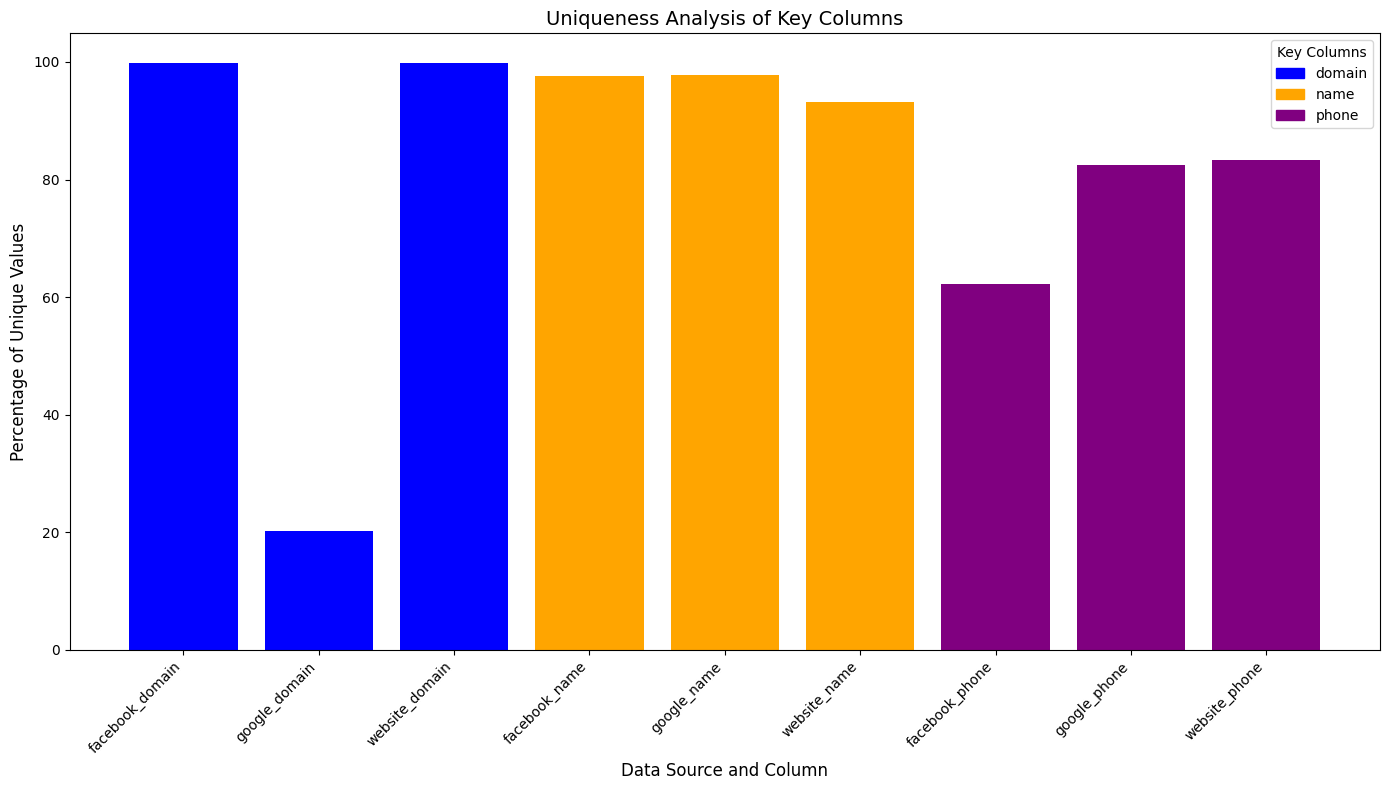

In [493]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
categories = ['facebook_domain', 'google_domain', 'website_domain',
              'facebook_name', 'google_name', 'website_name',
              'facebook_phone', 'google_phone', 'website_phone']
percentage_unique = [results['facebook_domain']['percentage_unique'],
                     results['google_domain']['percentage_unique'],
                     results['website_domain']['percentage_unique'],
                     results['facebook_name']['percentage_unique'],
                     results['google_name']['percentage_unique'],
                     results['website_name']['percentage_unique'],
                     results['facebook_phone']['percentage_unique'],
                     results['google_phone']['percentage_unique'],
                     results['website_phone']['percentage_unique']]

key_column_colors = {
    'domain': 'blue',
    'name': 'orange',
    'phone': 'purple'
}
# Create a color map that groups colors by the key column.
bar_colors = []
for cat in categories:
  if 'domain' in cat:
    bar_colors.append(key_column_colors['domain'])
  elif 'name' in cat:
    bar_colors.append(key_column_colors['name'])
  else:
    bar_colors.append(key_column_colors['phone'])

# Create the bar chart
plt.figure(figsize=(14, 8))  # Adjust figure size as needed

plt.bar(categories, percentage_unique, color=bar_colors)
plt.xlabel("Data Source and Column", fontsize=12)
plt.ylabel("Percentage of Unique Values", fontsize=12)
plt.title("Uniqueness Analysis of Key Columns", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Create custom legend for key columns
key_patches = [plt.Rectangle((0, 0), 1, 1, color=key_column_colors[key]) for key in key_column_colors]
plt.legend(key_patches, key_column_colors.keys(), title="Key Columns", loc='upper right')

plt.show()

### Distribution & Coverage Analysis

In [494]:
# Calculate the percentage of missing values for each column in each DataFrame.
facebook_missing_percentage = facebook_df.isnull().sum() / len(facebook_df) * 100
google_missing_percentage = google_df.isnull().sum() / len(google_df) * 100
website_missing_percentage = website_df.isnull().sum() / len(website_df) * 100

# Identify the dataset with the most missing values per column.
print("Facebook Missing Value Percentage:\n", facebook_missing_percentage)
print("\nGoogle Missing Value Percentage:\n", google_missing_percentage)
print("\nWebsite Missing Value Percentage:\n", website_missing_percentage)

# Find the dataset with the maximum missing values for each column.
max_missing_df = pd.DataFrame({
    'Facebook': facebook_missing_percentage,
    'Google': google_missing_percentage,
    'Website': website_missing_percentage
}).idxmax(axis=1)
print("\nDataset with Maximum Missing Values per Column:\n", max_missing_df)

# Analyze for systematic missingness (e.g., websites missing phone numbers)
print("\nSystematic Missingness:")
print("Website Phone Number Missing Percentage:", website_missing_percentage['phone'])
print("Google Phone Number Missing Percentage:", google_missing_percentage['phone'])
print("Facebook Phone Number Missing Percentage:", facebook_missing_percentage['phone'])


Facebook Missing Value Percentage:
 domain                 0.133489
address               20.342293
city                  37.376874
country_code          19.638316
country               36.958141
description           61.795495
email                 72.244158
link                   0.000000
name                   0.000000
page_type              0.005621
phone                  0.000000
phone_country_code    47.235376
region_code           37.383900
region                37.383900
zip_code              49.944497
category               0.000000
dtype: float64

Google Missing Value Percentage:
 address                7.381999
category               0.000000
city                  12.892124
country_code          14.863155
country               12.881747
name                   0.000000
phone                  0.000000
phone_country_code    32.520285
raw_address           12.687468
raw_phone              8.055920
region_code           12.935361
region                12.933919
description       

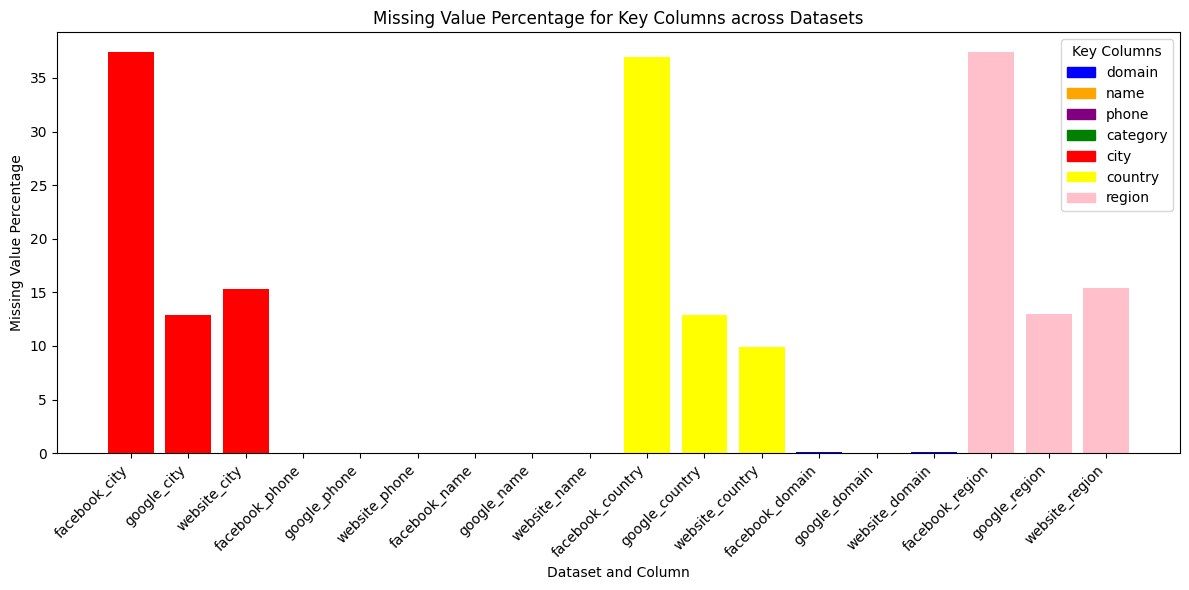

In [495]:
key_columns = common_columns_after_rename

# Create a dictionary to store the missing percentages for each dataset and column.
missing_data = {}
for col in key_columns:
    missing_data[f'facebook_{col}'] = facebook_missing_percentage[col] if col in facebook_missing_percentage.index else 0
    missing_data[f'google_{col}'] = google_missing_percentage[col] if col in google_missing_percentage.index else 0
    missing_data[f'website_{col}'] = website_missing_percentage[col] if col in website_missing_percentage.index else 0

# Prepare the data for plotting.
categories = list(missing_data.keys())
missing_percentages = list(missing_data.values())

# Create a color map that groups colors by the key column.
key_column_colors = {
    'domain': 'blue',
    'name': 'orange',
    'phone': 'purple',
    'category': 'green',
    'city': 'red',
    'country': 'yellow',
    'region': 'pink'
}
bar_colors = []
for cat in categories:
    for key_column in key_column_colors:
        if key_column in cat:
          bar_colors.append(key_column_colors[key_column])
          break
    else:
      bar_colors.append('gray') #Default color if no key column is found.

# Create the bar chart.
plt.figure(figsize=(12, 6))
plt.bar(categories, missing_percentages, color=bar_colors) # Colors added
plt.xlabel("Dataset and Column")
plt.ylabel("Missing Value Percentage")
plt.title("Missing Value Percentage for Key Columns across Datasets")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create custom legend for key columns
key_patches = [plt.Rectangle((0, 0), 1, 1, color=key_column_colors[key]) for key in key_column_colors]
plt.legend(key_patches, key_column_colors.keys(), title="Key Columns", loc='upper right')

# Show the plot.
plt.show()

In [496]:
# Analyze the frequency of business categories in each dataset.
def analyze_category_frequency(df):
    """
    Analyzes the frequency of business categories in a DataFrame.

    Args:
      df: The input DataFrame containing a 'category' column.

    Returns:
      A pandas Series representing the category frequency.
    """
    if 'category' not in df.columns:
        return pd.Series()  # Return empty series if 'category' column is missing

    category_counts = df['category'].explode().value_counts()
    return category_counts

# Get category frequency for each dataset
facebook_category_freq = analyze_category_frequency(facebook_df)
google_category_freq = analyze_category_frequency(google_df)
website_category_freq = analyze_category_frequency(website_df)

# Print or visualize the most frequent categories for each dataset
print("Most Frequent Facebook Categories:\n", facebook_category_freq.head(10))
print("\nMost Frequent Google Categories:\n", google_category_freq.head(10))
print("\nMost Frequent Website Categories:\n", website_category_freq.head(10))

# Compare category representation across datasets (example: top 5)


top_n = 50  # Number of top categories to compare
common_categories = set(facebook_category_freq.head(top_n).index) & set(google_category_freq.head(top_n).index) & set(website_category_freq.head(top_n).index)

print("\nCommon Top", top_n, "Categories across datasets:", len(common_categories))

# Calculating relative frequencies within each dataset to identify overrepresentation.
def relative_freq(series):
  return series / series.sum()

relative_freq_facebook = relative_freq(facebook_category_freq)
relative_freq_google = relative_freq(google_category_freq)
relative_freq_website = relative_freq(website_category_freq)

print("\nRelative Frequency:")
for category in common_categories:
  print(f"{category}: Facebook({relative_freq_facebook.get(category, 0):.2f}), Google({relative_freq_google.get(category, 0):.2f}), Website({relative_freq_website.get(category, 0):.2f})")


Most Frequent Facebook Categories:
 category
Business Consulting                       4499
Home Builders & Renovation Contractors    3335
Auto Services                             2879
General Contractors                       2576
Community Center                          2340
Elementary Schools                        2320
Social Services & NGOs                    2309
Construction Services                     2060
Real Estate - Agents & Managers           1986
Clinics - Surgeons & Physicians           1952
Name: count, dtype: int64

Most Frequent Google Categories:
 category
Clinics - Surgeons & Physicians                     17014
Executive, Legislative & Government Institutions    13528
Hotels                                              12785
Industrial Machinery & Supplies                      7279
Auto Parts & Repair Shops                            6590
Preschools & Kindergartens                           6456
Beauty Salons                                        6176
Middle Sc

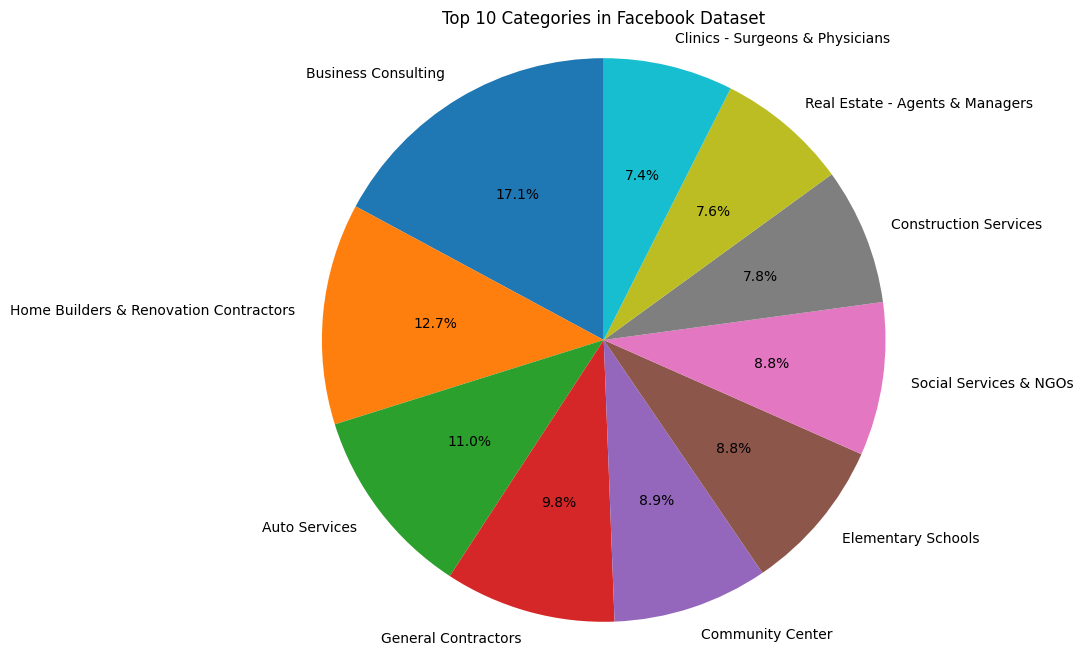

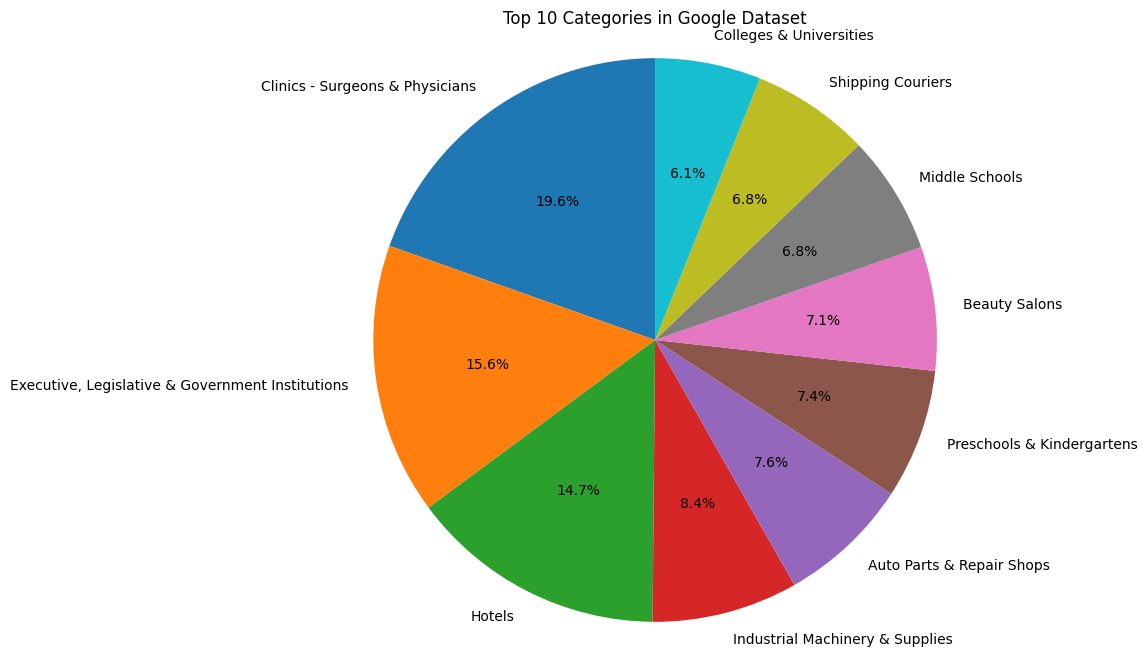

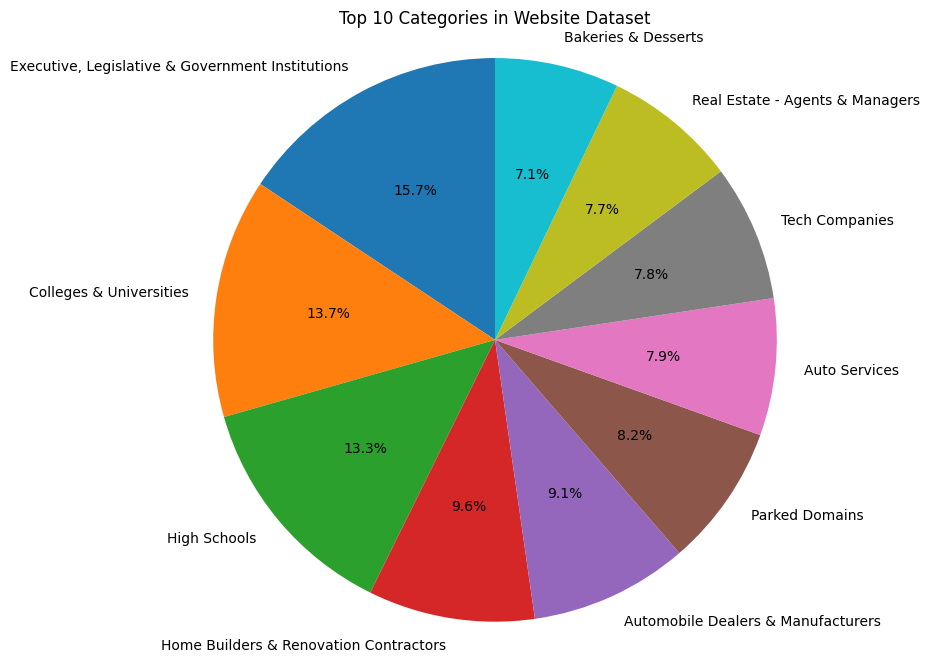

In [497]:
def plot_category_pie_charts(datasets, top_n=10):
  """Plots pie charts representing the relative frequency of top categories in each dataset."""

  for name, data in datasets.items():
      if 'category' in data.columns:
          category_counts = data['category'].explode().value_counts()
          relative_frequencies = category_counts / category_counts.sum()
          top_categories = relative_frequencies.head(top_n)

          plt.figure(figsize=(8, 8))
          plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90)
          plt.title(f"Top {top_n} Categories in {name} Dataset")
          plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
          plt.show()
      else:
          print(f"The '{name}' dataset does not contain a 'category' column.")

datasets = {
    "Facebook": facebook_df,
    "Google": google_df,
    "Website": website_df
}
plot_category_pie_charts(datasets)


### Conclusion


Analysis of the datasets has brought me to the following conclusions:

- The unique count of google domain values compared against the aproximate volume of the facebook and website datasets is indicative of an approximately equal volume in google as well after deduplication which may lead to better accuracy in merging.

- Through analyzing missing values in each column we can clearly see that the best candidates for merging are name, phone and domain as they have no apparent missing values.

- By analyzing category distribution across the datasets, we can certainly say there is no over-representation of one particular category out of the top 10, meaning the dataset is well balanced and can be used (after further processing) for training on DNN's.



In [498]:
website_linktr_ee_count = website_df[website_df['domain'].str.contains('linktr.ee', na=False)].shape[0]
google_linktr_ee_count = google_df[google_df['domain'].str.contains('linktr.ee', na=False)].shape[0]
facebook_linktr_ee_count = facebook_df[facebook_df['domain'].str.contains('linktr.ee', na=False)].shape[0]
print(f"Number of entries with 'linktr.ee' in domain column:")
print(f"Website: {website_linktr_ee_count}")
print(f"Google: {google_linktr_ee_count}")
print(f"Facebook: {facebook_linktr_ee_count}")


Number of entries with 'linktr.ee' in domain column:
Website: 1
Google: 728
Facebook: 1


In [499]:
# Separate linktr.ee rows from the datasets
facebook_linktree = facebook_df[facebook_df["domain"] == "linktr.ee"]
google_linktree = google_df[google_df["domain"] == "linktr.ee"]
website_linktree = website_df[website_df["domain"] == "linktr.ee"]

# Keep only regular domains
facebook_df = facebook_df[facebook_df["domain"] != "linktr.ee"]
google_df = google_df[google_df["domain"] != "linktr.ee"]
website_df = website_df[website_df["domain"] != "linktr.ee"]

In [500]:
# Merge linktr.ee rows using 'link' as a key instead of 'domain'
linktree_merged = facebook_linktree.merge(google_linktree, on="phone", how="outer", suffixes=("_facebook", "_google"))
linktree_merged = linktree_merged.merge(website_linktree, on="phone", how="outer")


In [501]:
common_columns_fb_google = set(facebook_df.columns) & set(google_df.columns)
print("Common columns between facebook_df and google_df:", common_columns_fb_google)

Common columns between facebook_df and google_df: {'city', 'phone', 'name', 'address', 'category', 'zip_code', 'description', 'country_code', 'country', 'region_code', 'phone_country_code', 'domain', 'region'}


In [502]:
# Conflict resolution (prioritize website over google, and google over facebook)
linktree_merged['domain'] = linktree_merged.get('domain_google').fillna(linktree_merged.get('domain_facebook'))
linktree_merged['name'] = linktree_merged.get('name').fillna(linktree_merged.get('name_google')).fillna(linktree_merged.get('name_facebook'))
linktree_merged['phone'] = pd.Series(pd.concat([linktree_merged.get('phone'), linktree_merged.get('phone_google'), linktree_merged.get('phone_facebook'), linktree_merged.get('raw_phone')], axis=1).bfill(axis=1).iloc[:, 0])
linktree_merged['city'] = linktree_merged.get('city').fillna(linktree_merged.get('city_google')).fillna(linktree_merged.get('city_facebook'))
linktree_merged['country'] = linktree_merged.get('country').fillna(linktree_merged.get('country_google')).fillna(linktree_merged.get('country_facebook'))
linktree_merged['region'] = linktree_merged.get('region').fillna(linktree_merged.get('region_google')).fillna(linktree_merged.get('region_facebook'))

def merge_categories(row):
    """Combines the category lists from multiple columns into a single list, removing duplicates."""
    categories = set()
    for col in ['category', 'category_google', 'category_facebook']:
        if isinstance(row.get(col, None), list):
            categories.update(row[col])
    return list(categories) if categories else None

linktree_merged['category'] = linktree_merged.apply(merge_categories, axis=1)

linktree_merged['region_code'] = linktree_merged.get('region_code_google').fillna(linktree_merged.get('region_code_facebook'))
linktree_merged['address'] = linktree_merged.get('raw_address').fillna(linktree_merged.get('address_google')).fillna(linktree_merged.get('address_facebook'))
linktree_merged['country_code'] = linktree_merged.get('country_code_google').fillna(linktree_merged.get('country_code_facebook'))
linktree_merged['phone_country_code'] = linktree_merged.get('phone_country_code_google').fillna(linktree_merged.get('phone_country_code_facebook'))
linktree_merged['description'] = linktree_merged.get('description_google').fillna(linktree_merged.get('description_facebook'))
linktree_merged['zip_code'] = linktree_merged.get('zip_code_google').fillna(linktree_merged.get('zip_code_facebook'))

In [503]:
linktree_merged.drop(columns=[
    'domain_google',
    'domain_facebook',

    'name_google',
    'name_facebook',

    'phone_google',
    'phone_facebook',

    'city_google',
    'city_facebook',

    'country_google',
    'country_facebook',

    'region_google',
    'region_facebook',

    'category_google',
    'category_facebook',

    'region_code_google',
    'region_code_facebook',

    'address_google',
    'address_facebook',

    'country_code_google',
    'country_code_facebook',

    'phone_country_code_google',
    'phone_country_code_facebook',

    'description_google',
    'description_facebook',

    'zip_code_google',
    'zip_code_facebook',

    'country_code',
    'region_code',
    'phone_country_code',
    'domain_suffix',
    'tld',
    'page_type',
    'language',
    'raw_phone',
    'raw_address',

    ], inplace=True, errors='ignore')

In [504]:
print("\nMerged DataFrame after conflict resolution:\n", linktree_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   email        0 non-null      object
 1   link         136 non-null    object
 2   phone        729 non-null    object
 3   domain       728 non-null    object
 4   legal_name   1 non-null      object
 5   city         464 non-null    object
 6   country      464 non-null    object
 7   region       464 non-null    object
 8   name         729 non-null    object
 9   category     675 non-null    object
 10  address      489 non-null    object
 11  description  703 non-null    object
 12  zip_code     372 non-null    object
dtypes: object(13)
memory usage: 74.2+ KB

Merged DataFrame after conflict resolution:
 None


In [505]:
def deduplicate_phone(df):
    """Deduplicates the 'phone' column of a DataFrame, keeping the first occurrence."""
    return df.drop_duplicates(subset='phone', keep='first')

linktree_merged = deduplicate_phone(linktree_merged)

print("\nLinktree DataFrame size after deduplication:\n", linktree_merged.shape)


Linktree DataFrame size after deduplication:
 (592, 13)


In [506]:
# Deduplication on 'domain' column
def deduplicate_domain(df):
    """Deduplicates the 'domain' column of a DataFrame, keeping the first occurrence."""
    return df.drop_duplicates(subset='domain', keep='first')

google_df = deduplicate_domain(google_df)
facebook_df = deduplicate_domain(facebook_df)
website_df = deduplicate_domain(website_df)

print("\nGoogle DataFrame size after deduplication:\n", google_df.shape)
print("\nFacebook DataFrame size after deduplication:\n", facebook_df.shape)
print("\nWebsite DataFrame size after deduplication:\n", website_df.shape)


Google DataFrame size after deduplication:
 (70018, 15)

Facebook DataFrame size after deduplication:
 (71072, 16)

Website DataFrame size after deduplication:
 (71910, 11)


In [507]:
# Drop rows with missing 'domain' values
def drop_missing_domain(df):
    """Drops rows where the 'domain' column is missing."""
    return df.dropna(subset=['domain'])

google_df = drop_missing_domain(google_df)
facebook_df = drop_missing_domain(facebook_df)
website_df = drop_missing_domain(website_df)

print("\nGoogle DataFrame size after dropping missing 'domain' values:\n", google_df.shape)
print("\nFacebook DataFrame size after dropping missing 'domain' values:\n", facebook_df.shape)
print("\nWebsite DataFrame size after dropping missing 'domain' values:\n", website_df.shape)


Google DataFrame size after dropping missing 'domain' values:
 (70017, 15)

Facebook DataFrame size after dropping missing 'domain' values:
 (71071, 16)

Website DataFrame size after dropping missing 'domain' values:
 (71909, 11)


In [508]:
merged_df = facebook_df.merge(google_df, on='domain', how='outer', suffixes=('_facebook', '_google'))
merged_df = merged_df.merge(website_df, on='domain', how='outer')

In [509]:
# Conflict resolution (prioritize website over google, and google over facebook)
merged_df['name'] = merged_df['name'].fillna(merged_df['name_google']).fillna(merged_df['name_facebook'])
merged_df['phone'] = merged_df['phone'].fillna(merged_df['phone_google']).fillna(merged_df['phone_facebook']).fillna(merged_df['raw_phone'])
merged_df['city'] = merged_df['city'].fillna(merged_df['city_google']).fillna(merged_df['city_facebook'])
merged_df['country'] = merged_df['country'].fillna(merged_df['country_google']).fillna(merged_df['country_facebook'])
merged_df['region'] = merged_df['region'].fillna(merged_df['region_google']).fillna(merged_df['region_facebook'])

def merge_categories(row):
    """Combines the category lists from multiple columns into a single list, removing duplicates."""
    categories = set()
    for col in ['category', 'category_google', 'category_facebook']:
        if col in row and isinstance(row[col], list):
            categories.update(row[col])
    return list(categories)

merged_df['category'] = merged_df.apply(merge_categories, axis=1)

merged_df['region_code'] = merged_df['region_code_google'].fillna(merged_df['region_code_facebook'])
merged_df['address'] = merged_df['raw_address'].fillna(merged_df['address_google']).fillna(merged_df['address_facebook'])
merged_df['country_code'] = merged_df['country_code_google'].fillna(merged_df['country_code_facebook'])
merged_df['phone_country_code'] = merged_df['phone_country_code_google'].fillna(merged_df['phone_country_code_facebook'])
merged_df['description'] = merged_df['description_google'].fillna(merged_df['description_facebook'])
merged_df['zip_code'] = merged_df['zip_code_google'].fillna(merged_df['zip_code_facebook'])

In [510]:
merged_df.drop(columns=[
    'name_google',
    'name_facebook',

    'phone_google',
    'phone_facebook',

    'city_google',
    'city_facebook',

    'country_google',
    'country_facebook',

    'region_google',
    'region_facebook',

    'category_google',
    'category_facebook',

    'region_code_google',
    'region_code_facebook',

    'address_google',
    'address_facebook',

    'country_code_google',
    'country_code_facebook',

    'phone_country_code_google',
    'phone_country_code_facebook',

    'description_google',
    'description_facebook',

    'zip_code_google',
    'zip_code_facebook',

    'country_code',
    'region_code',
    'phone_country_code',
    'domain_suffix',
    'tld',
    'page_type',
    'language',
    'raw_phone',
    'raw_address',

    ], inplace=True)

In [511]:
print("\nMerged DataFrame after conflict resolution:\n", merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71914 entries, 0 to 71913
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   domain       71914 non-null  object
 1   email        19729 non-null  object
 2   link         71071 non-null  object
 3   legal_name   31951 non-null  object
 4   city         69806 non-null  object
 5   country      70747 non-null  object
 6   region       69782 non-null  object
 7   phone        71914 non-null  object
 8   name         71914 non-null  object
 9   category     71914 non-null  object
 10  address      69412 non-null  object
 11  description  70508 non-null  object
 12  zip_code     57353 non-null  object
dtypes: object(13)
memory usage: 7.1+ MB

Merged DataFrame after conflict resolution:
 None


In [522]:
final_df = pd.concat([merged_df, linktree_merged], ignore_index=True)

In [523]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72506 entries, 0 to 72505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   domain       72505 non-null  object
 1   email        19729 non-null  object
 2   link         71072 non-null  object
 3   legal_name   31952 non-null  object
 4   city         70214 non-null  object
 5   country      71155 non-null  object
 6   region       70190 non-null  object
 7   phone        72506 non-null  object
 8   name         72506 non-null  object
 9   category     72452 non-null  object
 10  address      69843 non-null  object
 11  description  71099 non-null  object
 12  zip_code     57681 non-null  object
dtypes: object(13)
memory usage: 7.2+ MB
None


In [533]:
final_df[:-300]

,domain,email,link,legal_name,city,country,region,phone,name,category,address,description,zip_code
0,007group.com,NaN,https://007group.com,Hawkeye Holdings Ltd.,kelowna,canada,british columbia,+12507657007,hawkeye holdings,"[Buses, Shuttles & Local Transit, Trucking and...",3396 Sexsmith Rd,5.0 (6) · Trucking company 3396 Sexsmith Rd Op...,v1x 7s5
1,007print.be,NaN,https://007print.be,NaN,hasselt,belgium,flanders,+32499228888,007print,"[Construction Services, Business Consulting, C...","Hendrik van Veldekesingel 150/94, 3500 Hasselt...",1.0 (1) · Construction company Hendrik van Vel...,3500
2,01remote.com,service@01remote.com,http://01remote.com,NaN,mississauga,canada,ontario,,,"[Computer Repair & Service, Computer Stores, C...","100 City Centre Dr, Mississauga, ON L5B 3C7, C...",No reviews · Computer support and services 100...,l5b 3c7
3,08rotulacion.com,NaN,https://08rotulacion.com,NaN,galapagar,spain,madrid,+34622051208,08 rotulacion,"[Decorators & Interior Designers, Graphic Desi...","Plaza del Caño, 1, Local 1A","5.0 (1) · Digital printer Plaza del Caño, 1, L...",28260
4,1000butterflies.ca,NaN,https://1000butterflies.ca,Harmonious Healing Inc.,calgary,canada,alberta,+14035123715,1000 butterflies blossom spa,[Alternative Therapy],2411 Erlton Rd SW,5.0 (18) · Reiki therapist 2411 Erlton Rd SW C...,t2s 3b9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72201,linktr.ee,NaN,NaN,NaN,louisville,united states,mississippi,+166270532450,387 ent,"[Musicians, Orchestras & Bands]","Louisville, MS","No reviews · Musician Louisville, MS Open ⋅ Cl...",39339
72202,linktr.ee,NaN,NaN,NaN,NaN,NaN,NaN,+166796704410,snatched body companyntouring,[Nutritionists & Weight Loss Specialists],6340 Security Blvd Suite B16,No reviews · Nutritionist 6340 Security Blvd S...,NaN
72203,linktr.ee,NaN,NaN,NaN,atlanta,united states,georgia,+16786369402,happy hearts pet care services,[Pet Boarding & Sitting],"Atlanta, GA, United States","5.0 (39) · Pet sitter Atlanta, GA, United Stat...",30309
72204,linktr.ee,NaN,NaN,NaN,NaN,NaN,NaN,+167880997920,noir pearl spa,[Spa & Wellness Centers],NaN,5.0 (15) · Facial spa Temporarily closed · (67...,NaN


In [532]:
def calculate_non_null_percentage(df):
  """Calculates the percentage of non-null values for each column in a DataFrame."""
  non_null_percentages = df.notnull().sum() / len(df) * 100
  return non_null_percentages


coverage = calculate_non_null_percentage(final_df)
print(coverage)


domain          99.998621
email           27.210162
link            98.022233
legal_name      44.068077
city            96.838882
country         98.136706
region          96.805782
phone          100.000000
name           100.000000
category        99.925523
address         96.327201
description     98.059471
zip_code        79.553416
dtype: float64
